# Data preparation

In [1]:
import pandas as pd
import pickle as rick
from sklearn.preprocessing import StandardScaler

In [3]:
# Import with pandas
df = pd.read_csv('data/ai4i2020.csv', encoding= 'unicode_escape')

In [11]:
# Describe
df.describe()

,ï»¿UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [10]:
# And then create a target column
y = df['Machine failure'].tolist()

In [15]:
# And create a training set by removing the outher columns
X = df.drop(columns=['ï»¿UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])

# Show 
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


### Standardization

In [16]:
# Use Z-scale transformation
scaler = StandardScaler()

scaler.fit(X)

StandardScaler()

In [17]:
# Show transformed data
X = scaler.transform(X)

print(X)

[[-0.95238944 -0.94735989  0.06818514  0.28219976 -1.69598374]
 [-0.90239341 -0.879959   -0.72947151  0.63330802 -1.6488517 ]
 [-0.95238944 -1.01476077 -0.22744984  0.94428963 -1.61743034]
 ...
 [-0.50242514 -0.94735989  0.59251888 -0.66077672 -1.35034876]
 [-0.50242514 -0.879959   -0.72947151  0.85400464 -1.30321671]
 [-0.50242514 -0.879959   -0.2162938   0.02137647 -1.22466331]]


In [18]:
# Save 'X' as pickle object
with open('X.pickle', 'wb') as f:
    rick.dump(X, f)

# Save 'y' as pickle object
with open('y.pickle', 'wb') as f:
    rick.dump(y, f) 

### Dimension reduction

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [21]:
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)

PCA(n_components=2)

In [22]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.3821481  0.36817048]
[138.22953731 135.67801622]


In [23]:
# Create PCA dot plot
X_reduced = PCA(n_components=2).fit_transform(X)

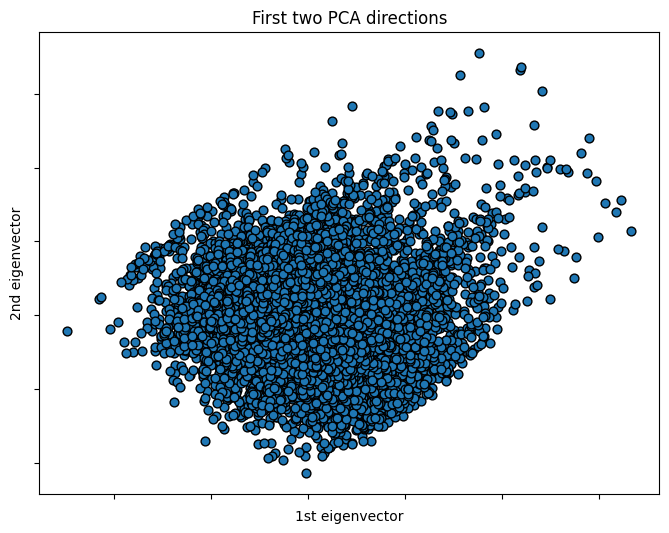

In [24]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    edgecolor="k",
    s=40,
)

ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
#plt.show()
plt.savefig('pca.png')